
Iris Dataset Practice Project

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset and Perform EDA

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

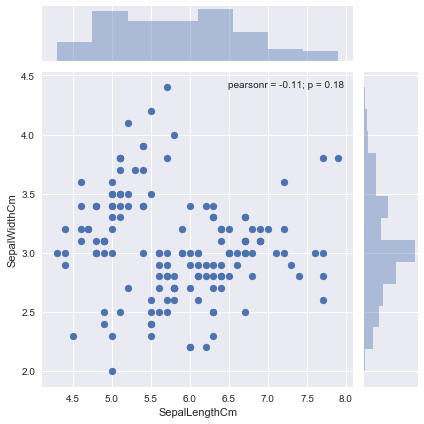

In [6]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=df)

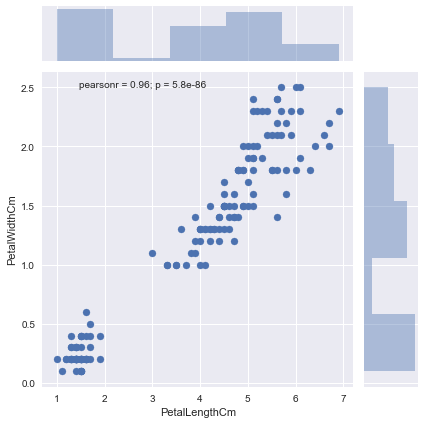

In [7]:
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=df)

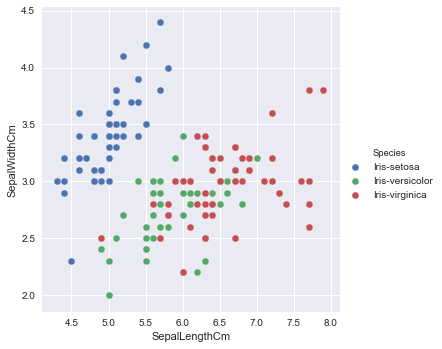

In [8]:
#Relation between Sepal length and width with hue=Species
sns.pairplot(data=df,hue='Species',x_vars=['SepalLengthCm'],y_vars=['SepalWidthCm'],size=5)

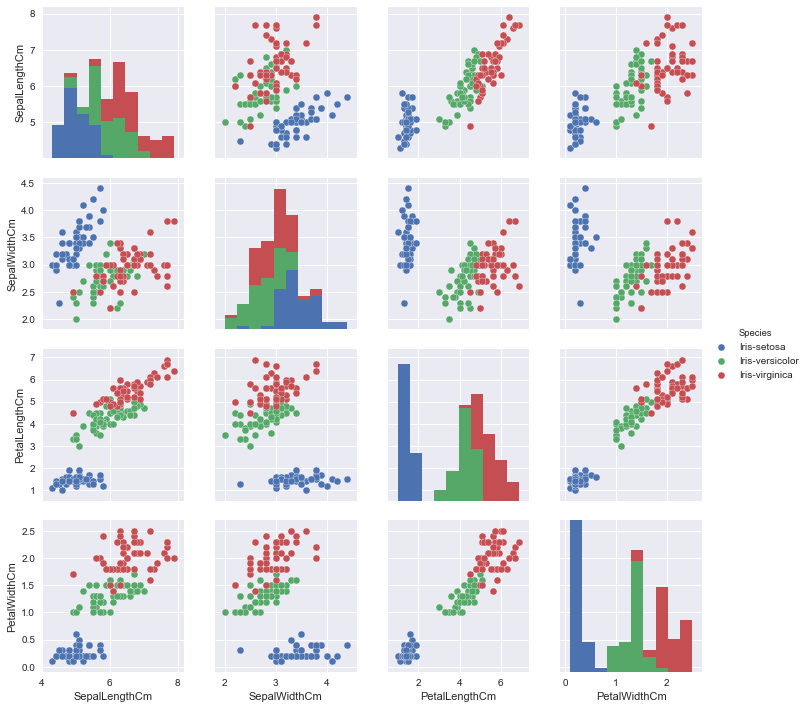

In [9]:
sns.pairplot(data=df.drop("Id",axis=1),hue='Species')

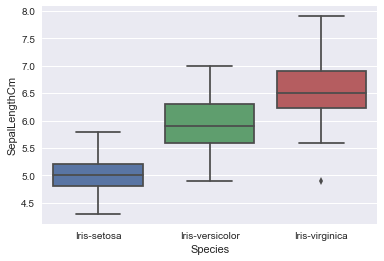

In [10]:
sns.boxplot(x='Species',y='SepalLengthCm',data=df)

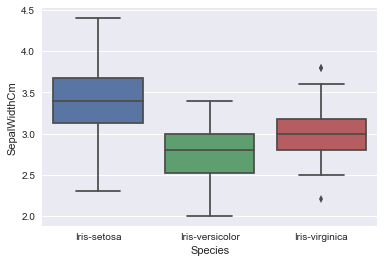

In [11]:
sns.boxplot(x='Species',y='SepalWidthCm',data=df)

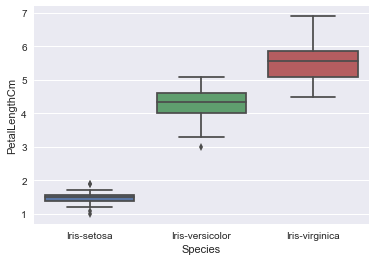

In [12]:
sns.boxplot(x='Species',y='PetalLengthCm',data=df)

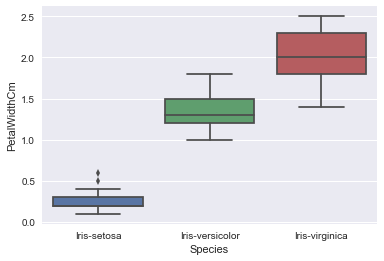

In [13]:
sns.boxplot(x='Species',y='PetalWidthCm',data=df)

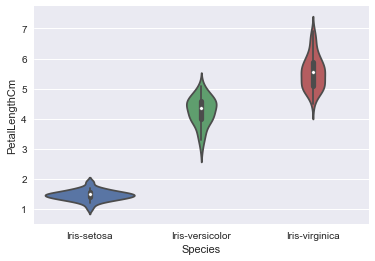

In [14]:
sns.violinplot(x='Species',y='PetalLengthCm',data=df)

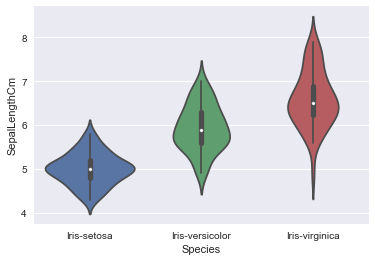

In [15]:
sns.violinplot(x='Species',y='SepalLengthCm',data=df)

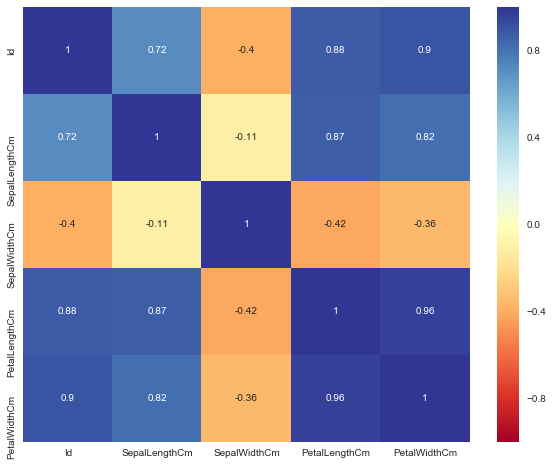

In [16]:
fig,ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu')
fig=plt.gcf()
fig.set_size_inches(10,8)

In [17]:
df1 = df.drop("Id",axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Build Model for the Dataset 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Species',axis=1), 
                                                    df1['Species'], test_size=0.30, 
                                                    random_state=101)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [19]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from xgboost import XGBClassifier

In [20]:
models = [LogisticRegression(),SVC(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),XGBClassifier()]

In [21]:
for model in models:
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    print(type(model))
    print(confusion_matrix(y_test,prediction))
    print(accuracy_score(y_test,prediction))
    print(classification_report(y_test,prediction))
    print()

<class 'sklearn.linear_model.logistic.LogisticRegression'>
[[13  0  0]
 [ 0 18  2]
 [ 0  0 12]]
0.955555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.90      0.95        20
 Iris-virginica       0.86      1.00      0.92        12

    avg / total       0.96      0.96      0.96        45


<class 'sklearn.svm.classes.SVC'>
[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

    avg / total       1.00      1.00      1.00        45


<class 'sklearn.ensemble.forest.RandomForestClassifier'>
[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
0.955555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versico

# Cross-Validation Using K-Fold

In [22]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[SVC(kernel='linear'),SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.960000,0.048990
Radial Svm,0.961818,0.062032
Logistic Regression,0.903636,0.094755
KNN,0.932727,0.060055
Decision Tree,0.940909,0.065839
Naive Bayes,0.950909,0.066457
Random Forest,0.932727,0.060055


#  Different Values of n_neighbors for Knn

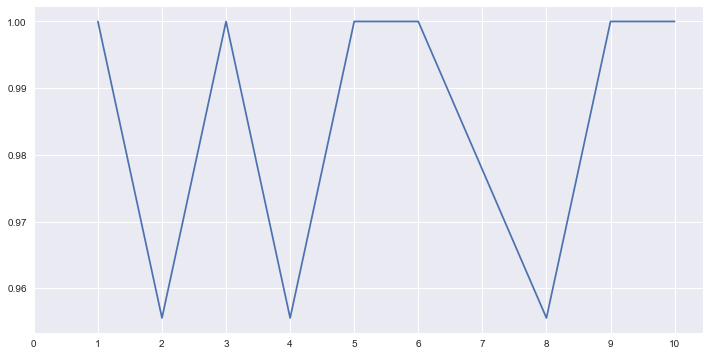

Accuracies for different values of n are: [ 1.          0.95555556  1.          0.95555556  1.          1.
  0.97777778  0.95555556  1.          1.        ] with the max value as  1.0


In [23]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())